In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import json
import seaborn as sns
import os

In [2]:
patients = [
    "Abdomen",
    "Head_Neck",
    "Lung",
    "Prostate"
]

In [3]:
plans = {
    "Abdomen":[
            "JSu-IM103",
            "JSu-IM105"
    ],
    "Head_Neck": [
        "JSu-IM101",
        "JSu-IM102",
        "JSu-IM103",
        "JSu-VA104",
        "JSu-VA105"
    ],
    "Lung": [
       "JSu-IM102",
       "JSu-IM105",
       "JSu-IM107"
    ],
    "Prostate": [
        "C1-IM107",
        "C1-IM108",
        "C1-VA109"
    ]
}

In [4]:
tissues = {
    "Abdomen": [
        "Bladder",
        "Body",
        "Bowel",
        "Femur_L",
        "Femur_R",
        "PTV_45",
        "PTV_50.4",
        "Rectum"
    ],
    "Head_Neck": [
        "Body",
        "BrainStem",
        "Larynx",
        "Lips",
        "Mandible",
        "Parotid Right",
        "PTV56",
        "PTV63",
        "PTV70",
        "Spinal Cord"
    ],
    "Lung": [
        "Body",
        "Heart",
        "Lung left",
        "Lung right",
        "Lung-GTV",
        "PTV_63",
        "Spinal cord" 
    ],
    "Prostate": [
        "Bladder",
        "Body",
        "prostate_bed",
        "PTV_56",
        "PTV_68",
        "Rectum"     
    ],
}

In [5]:
images = {
    "Abdomen": "15657-Series-3-CT02",
    "Head_Neck": "Study-1-Series-2-CT02",
    "Lung": "1622-Series-CT01",
    "Prostate": "S-Series-2-CT03"
}

In [10]:
patient = "Lung"
data = {}
for plan in plans[patient]:
    data[plan] = {}
    for tissue in tissues[patient]:
        with open('{}/plans/{}/curves/{}'.format(patient, plan, tissue), 'r') as file:
            d = json.load(file)
            data[plan][tissue] = {'MinDose': d['MinDose'],
                                  'MaxDose': d['MaxDose'],
                                  'MeanDose': d['MeanDose']}
            
data

{'JSu-IM102': {'Body': {'MinDose': 0.008508665613719999,
   'MaxDose': 69.69660720838394,
   'MeanDose': 7.1462547616045216},
  'Heart': {'MinDose': 0.5700805961192399,
   'MaxDose': 66.64199625305847,
   'MeanDose': 9.860790759701734},
  'Lung left': {'MinDose': 0.4615086823852985,
   'MaxDose': 49.66835072082966,
   'MeanDose': 8.005528356283106},
  'Lung right': {'MinDose': 0.6955834139216097,
   'MaxDose': 67.5524234737265,
   'MeanDose': 21.993454368046454},
  'Lung-GTV': {'MinDose': 0.5034422740626965,
   'MaxDose': 68.17036531392291,
   'MeanDose': 15.188363162654564},
  'PTV_63': {'MinDose': 48.130793482861655,
   'MaxDose': 69.69660720838394,
   'MeanDose': 64.01368957557098},
  'Spinal cord': {'MinDose': 0.21484380674642997,
   'MaxDose': 44.921500107634735,
   'MeanDose': 9.819286748371516}},
 'JSu-IM105': {'Body': {'MinDose': 0.0,
   'MaxDose': 63.027404999999995,
   'MeanDose': 5.030598928743275},
  'Heart': {'MinDose': 0.8087818846153845,
   'MaxDose': 59.98665312499999,


In [43]:
sns.set_palette("Set2")
sns.set_context('poster')

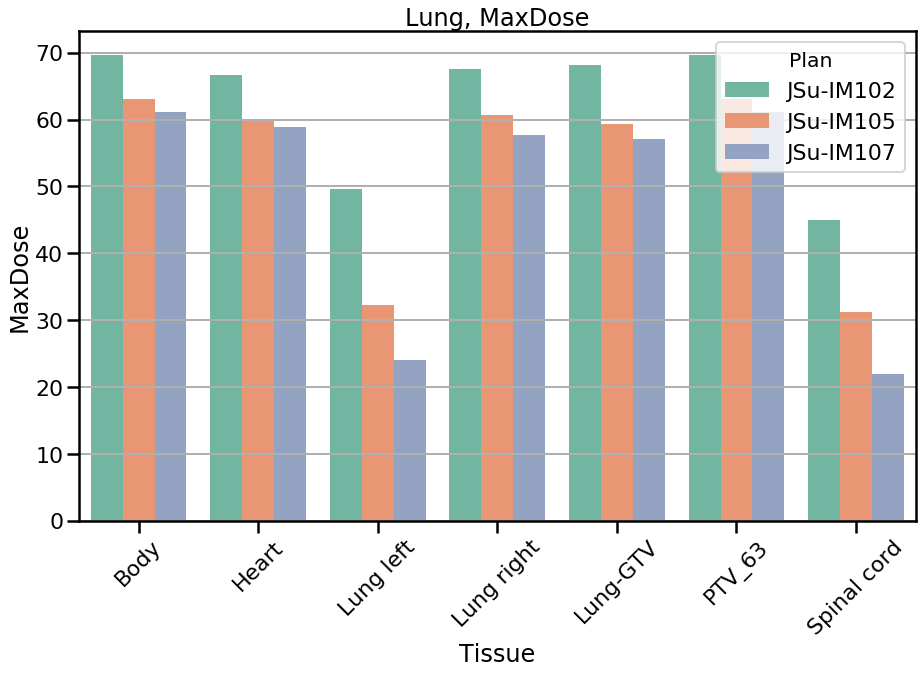

In [48]:
plt.figure(figsize=(15, 9))
patient = "Lung"
dose = 'MaxDose'
d = pd.DataFrame(columns=['Tissue', 'Plan', dose])

n = len(tissues[patient])
for i, plan in enumerate(plans[patient]):
    for j, tissue in enumerate(tissues[patient]):
        d.loc[i*n + j] = [tissue, plan, data[plan][tissue][dose]]
sns.barplot(x='Tissue', y=dose, hue='Plan', data=d)
plt.xticks(rotation='45')
plt.title('{}, {}'.format(patient, dose))
plt.grid(axis='y')

if not os.path.exists('Comapison/{}'.format(patient)):
    os.makedirs('Comapison/{}'.format(patient))
plt.savefig('Comapison/{}/{}'.format(patient, dose), dpi=100, bbox_inches='tight')

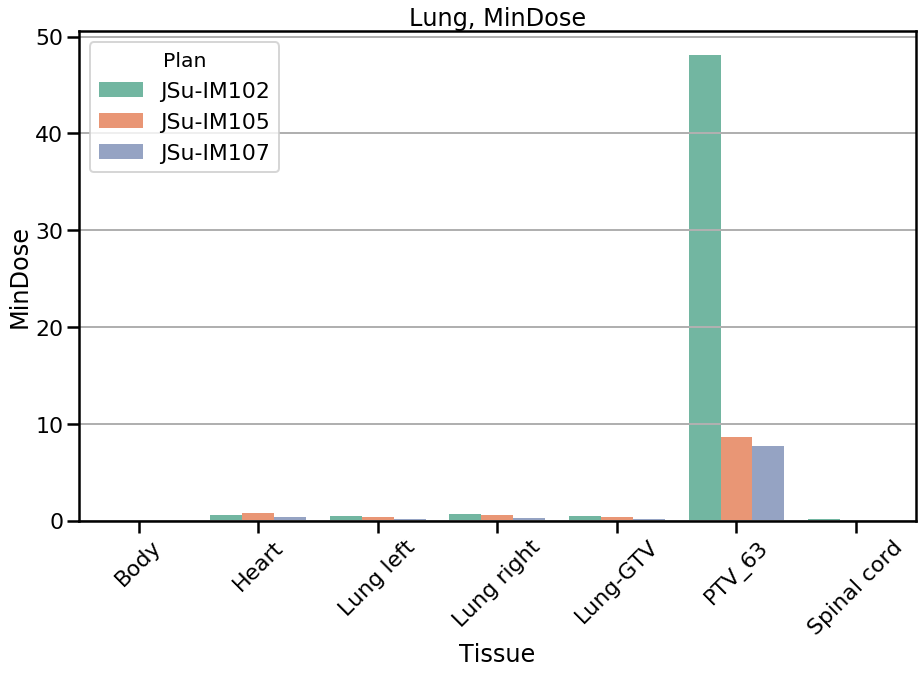

In [49]:
plt.figure(figsize=(15, 9))
patient = "Lung"
dose = 'MinDose'
d = pd.DataFrame(columns=['Tissue', 'Plan', dose])

n = len(tissues[patient])
for i, plan in enumerate(plans[patient]):
    for j, tissue in enumerate(tissues[patient]):
        d.loc[i*n + j] = [tissue, plan, data[plan][tissue][dose]]
sns.barplot(x='Tissue', y=dose, hue='Plan', data=d)
plt.xticks(rotation='45')
plt.title('{}, {}'.format(patient, dose))
plt.grid(axis='y')

if not os.path.exists('Comapison/{}'.format(patient)):
    os.makedirs('Comapison/{}'.format(patient))
plt.savefig('Comapison/{}/{}'.format(patient, dose), dpi=100, bbox_inches='tight')

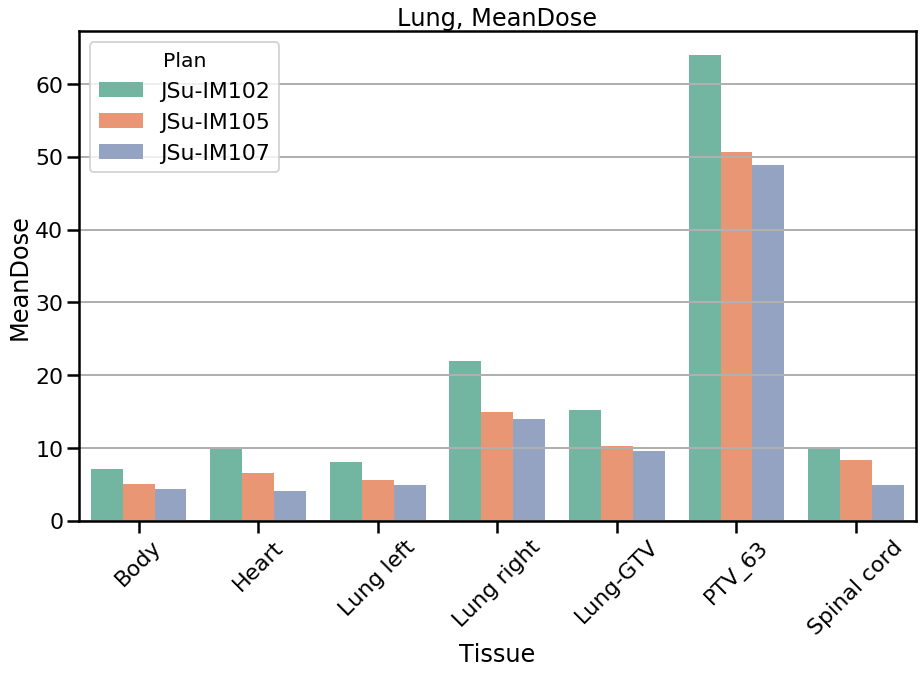

In [50]:
plt.figure(figsize=(15, 9))
patient = "Lung"
dose = 'MeanDose'
d = pd.DataFrame(columns=['Tissue', 'Plan', dose])

n = len(tissues[patient])
for i, plan in enumerate(plans[patient]):
    for j, tissue in enumerate(tissues[patient]):
        d.loc[i*n + j] = [tissue, plan, data[plan][tissue][dose]]
sns.barplot(x='Tissue', y=dose, hue='Plan', data=d)
plt.xticks(rotation='45')
plt.title('{}, {}'.format(patient, dose))
plt.grid(axis='y')

if not os.path.exists('Comapison/{}'.format(patient)):
    os.makedirs('Comapison/{}'.format(patient))
plt.savefig('Comapison/{}/{}'.format(patient, dose), dpi=100, bbox_inches='tight')